In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from model.model_nile import ModelNile
from plotter import HydroModelPlotter
from experimentation.data_generation import generate_input_data

In [3]:
nile_model = ModelNile()

In [5]:
opt_results = pd.read_csv("../outputs/baseline_results.csv").drop(columns= "Unnamed: 0")
opt_results

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v160,v161,v162,v163,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
0,0.031625,0.181810,0.997529,0.309545,0.792908,0.558124,0.185522,0.581572,0.653132,0.680084,...,0.258974,0.414938,0.845245,0.070192,32860.160621,532.574401,0.000000,42.930183,0.0,6.200764e+07
1,0.056201,0.713527,0.763359,0.865425,0.939490,0.995084,0.391960,0.799009,0.764611,0.100038,...,0.016836,0.343680,0.792727,0.212921,34722.987677,734.532301,0.562500,42.930183,0.0,6.227318e+07
2,0.020335,0.193194,0.184577,0.622718,0.101891,0.536598,0.494952,0.652872,0.597091,0.957275,...,0.630611,0.571315,0.828039,0.399100,31422.095961,652.042734,0.562500,43.255449,0.0,5.495098e+07
3,0.831486,0.793253,0.987696,0.306151,0.954972,0.794132,0.415361,0.403844,0.042967,0.780452,...,0.609311,0.833445,0.595390,0.595109,7609.454234,62.200044,0.000000,92.657943,0.0,1.255121e+05
4,0.000115,0.337710,0.980507,0.354126,0.774983,0.554867,0.200878,0.588770,0.676369,0.692490,...,0.044174,0.572185,0.240098,0.401478,18689.382578,340.888240,0.095833,0.033902,0.0,5.302814e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.012456,0.553450,0.395182,0.327546,0.225649,0.536598,0.511642,0.557706,0.905832,0.982441,...,0.637327,0.537654,0.843920,0.040168,18141.428488,307.088646,0.162500,0.000000,0.0,5.304743e+07
118,0.000115,0.849048,0.160053,0.315012,0.995780,0.719914,0.496777,0.165382,0.884575,0.801340,...,0.911342,0.575562,0.670057,0.110831,17270.116463,241.682454,0.000000,0.000000,0.0,5.268096e+07
119,0.000007,0.321933,0.429795,0.349747,0.956639,0.430595,0.439182,0.082064,0.796610,0.638064,...,0.541427,0.616892,0.708624,0.047388,19805.577704,334.260212,0.016667,0.005124,0.0,5.303458e+07
120,0.000012,0.194976,0.920689,0.348590,0.958199,0.438387,0.393838,0.220041,0.818565,0.638731,...,0.632377,0.573156,0.679720,0.131060,20382.644973,353.531612,0.000000,0.006364,0.0,5.303422e+07


In [6]:
best_obj_indices = dict()
directions = ["min", "min", "min", "min", "min", "max"]

for i, obj in enumerate(opt_results.columns[-6:]):
    if directions[i] == "min":
        indexes = opt_results.loc[opt_results[obj] == opt_results[obj].min(),:].index
    elif directions[i] == "max":
        indexes = opt_results.loc[opt_results[obj] == opt_results[obj].max(),:].index
    else: print("issue with directions!")
        
    best_obj_indices[obj] = indexes

In [7]:
best_obj_indices

{'egypt_irr': Int64Index([3], dtype='int64'),
 'egypt_90': Int64Index([93], dtype='int64'),
 'egypt_low_had': Int64Index([0, 3, 5, 15, 41, 52, 60, 74, 79, 91, 95, 97, 105, 106, 118, 120], dtype='int64'),
 'sudan_irr': Int64Index([  5,   7,   8,   9,  13,  14,  15,  16,  17,  19,  21,  24,  25,
              26,  29,  33,  34,  35,  36,  37,  41,  42,  43,  44,  45,  47,
              48,  49,  51,  57,  58,  59,  60,  61,  62,  66,  68,  70,  71,
              72,  73,  74,  75,  76,  79,  80,  81,  84,  87,  88,  90,  91,
              92,  93,  96,  97,  99, 100, 104, 106, 107, 109, 112, 117, 118,
             121],
            dtype='int64'),
 'sudan_90': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             112, 113, 114, 115, 116, 117, 118, 119, 120, 121],
            dtype='int64', length=122),
 'ethiopia_hydro': Int64Index([1], dtype='int64')}

In [8]:
best_indices_judgement_reduced = {'egypt_irr': 3,
 'egypt_90':93,
 'egypt_low_had': [0, 3, 5, 15, 41, 52, 60, 74, 79, 91, 95, 97, 105, 106, 118, 120],
 'sudan_irr':[  5,   7,   8,   9,  13,  14,  15,  16,  17,  19,  21,  24,  25,
              26,  29,  33,  34,  35,  36,  37,  41,  42,  43,  44,  45,  47,
              48,  49,  51,  57,  58,  59,  60,  61,  62,  66,  68,  70,  71,
              72,  73,  74,  75,  76,  79,  80,  81,  84,  87,  88,  90,  91,
              92,  93,  96,  97,  99, 100, 104, 106, 107, 109, 112, 117, 118,
             121],
 'sudan_90': range(122),
 'ethiopia_hydro':1}

In [9]:
policies, objectives = opt_results.iloc[:, :-6], opt_results.iloc[:, -6:]

In [10]:
best_egypt_irr_and_HAD = policies.loc[3]

In [11]:
best_egypt_90 = policies.loc[93]

In [12]:
best_ethiopia_hydro = policies.loc[1]

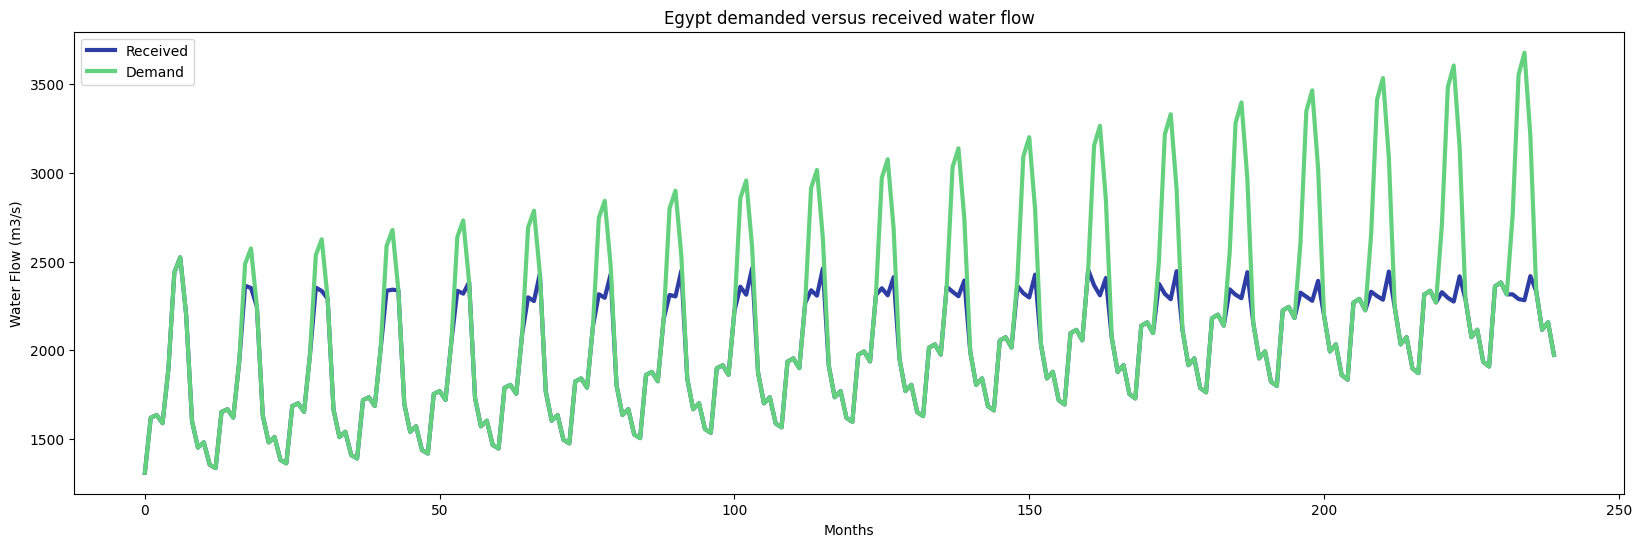

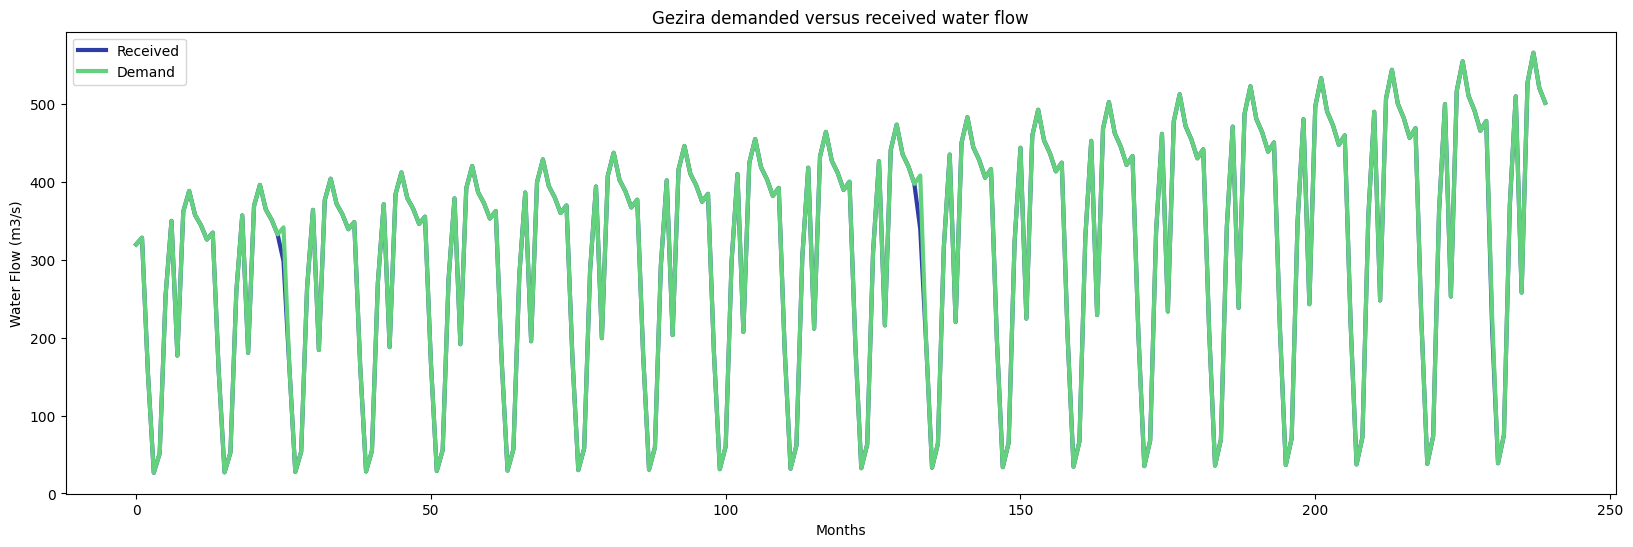

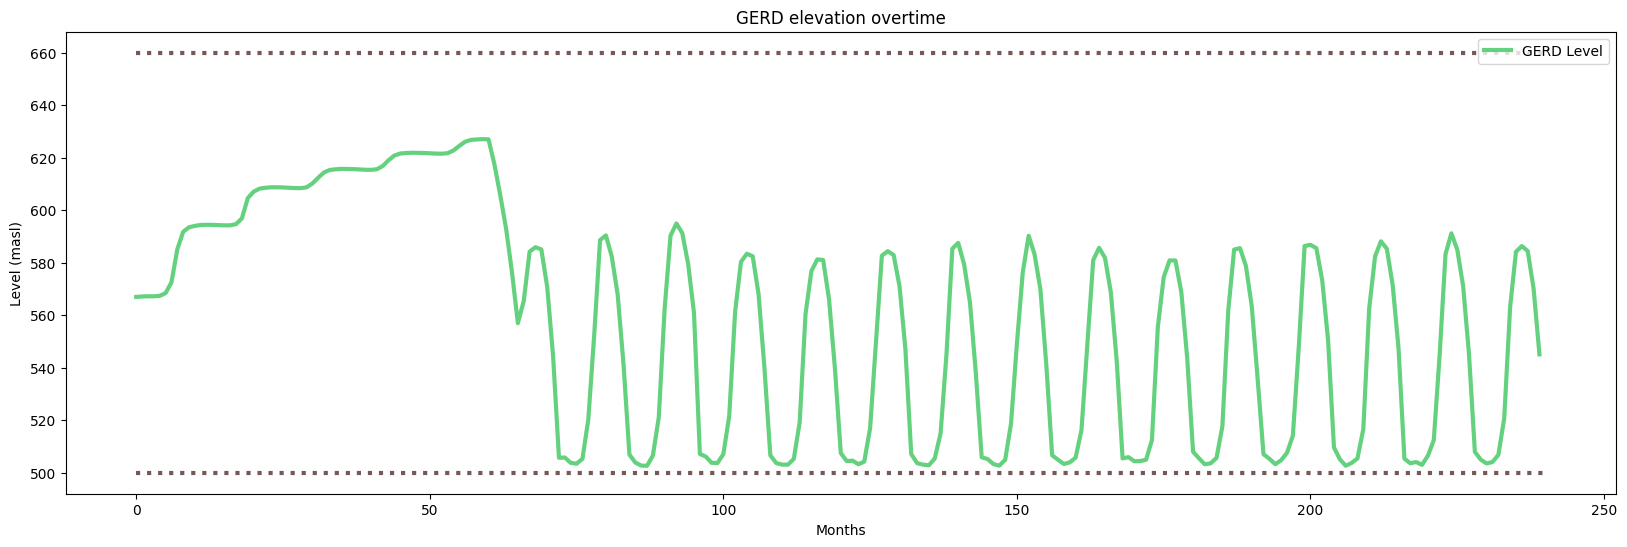

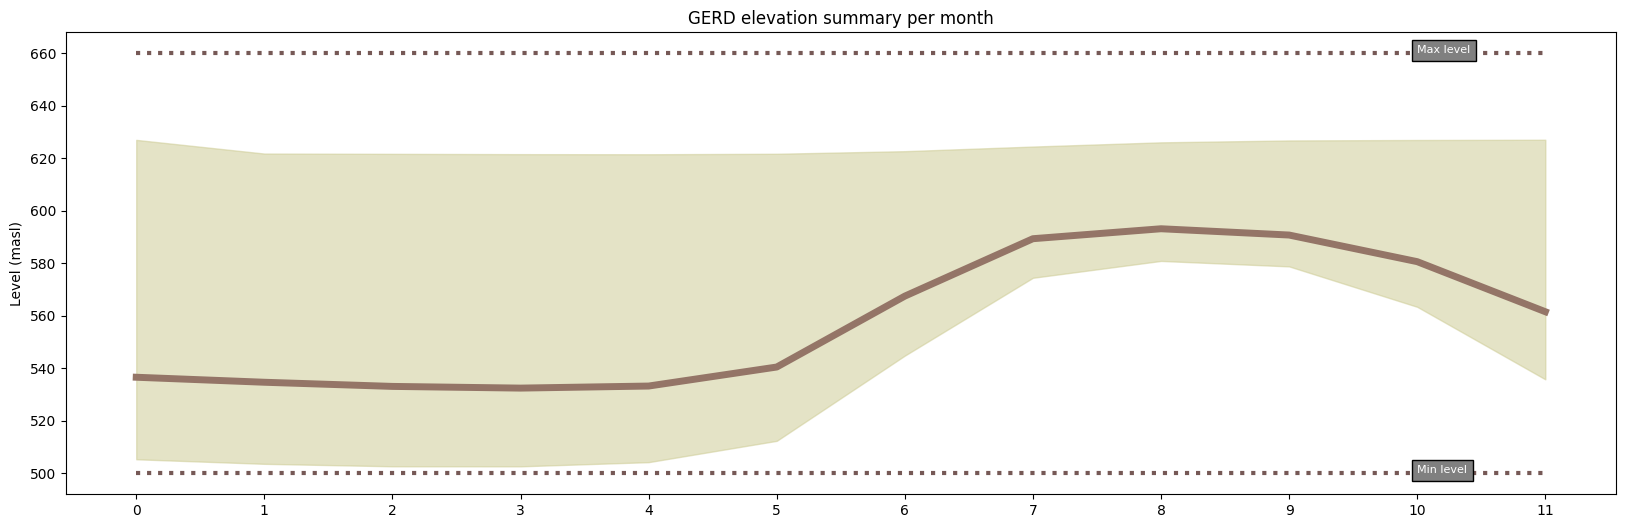

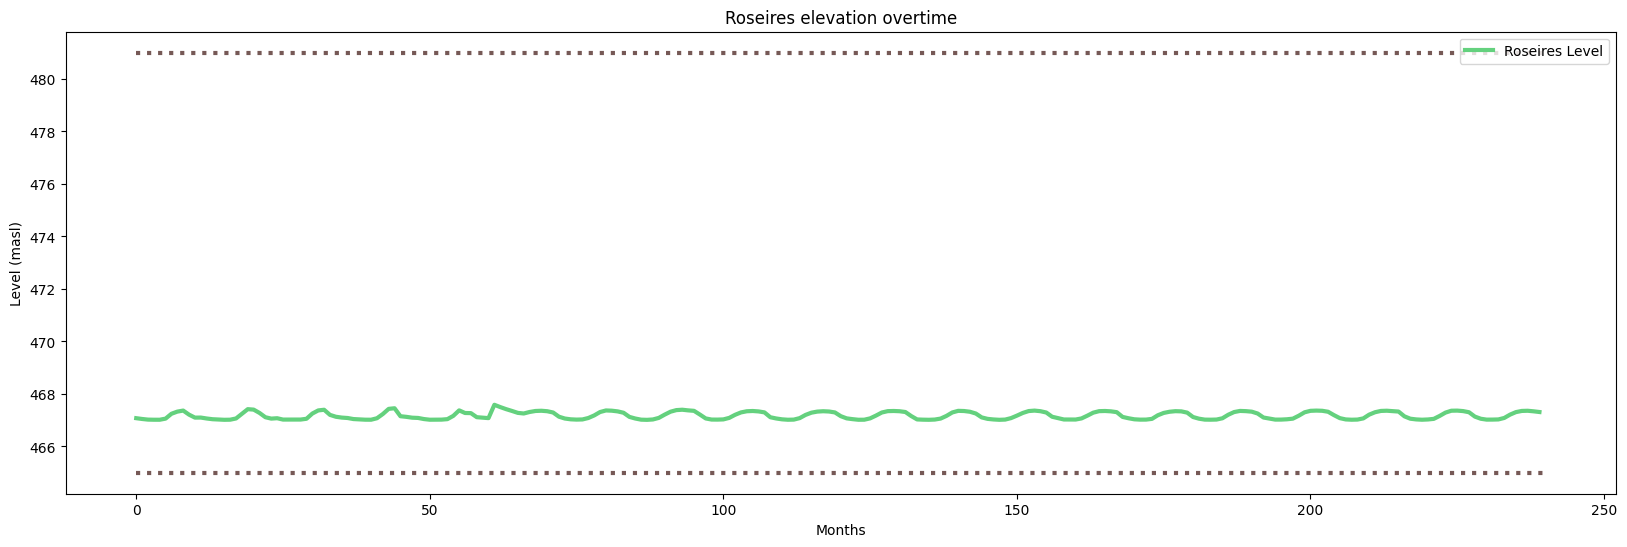

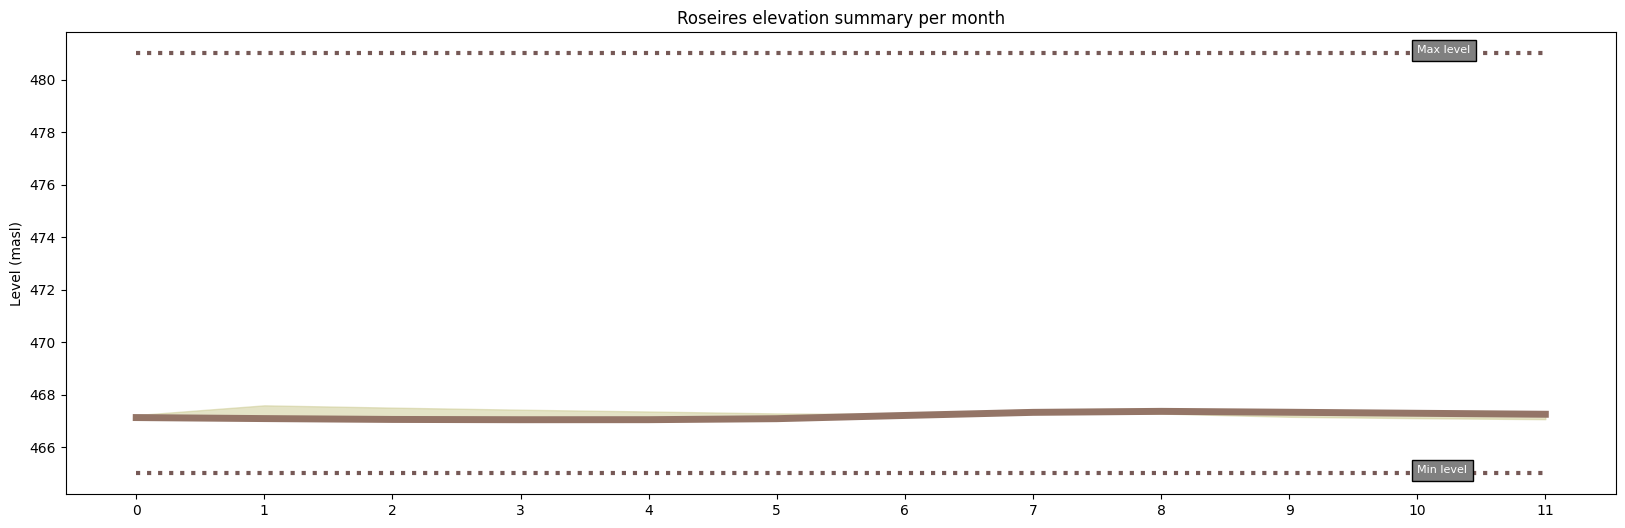

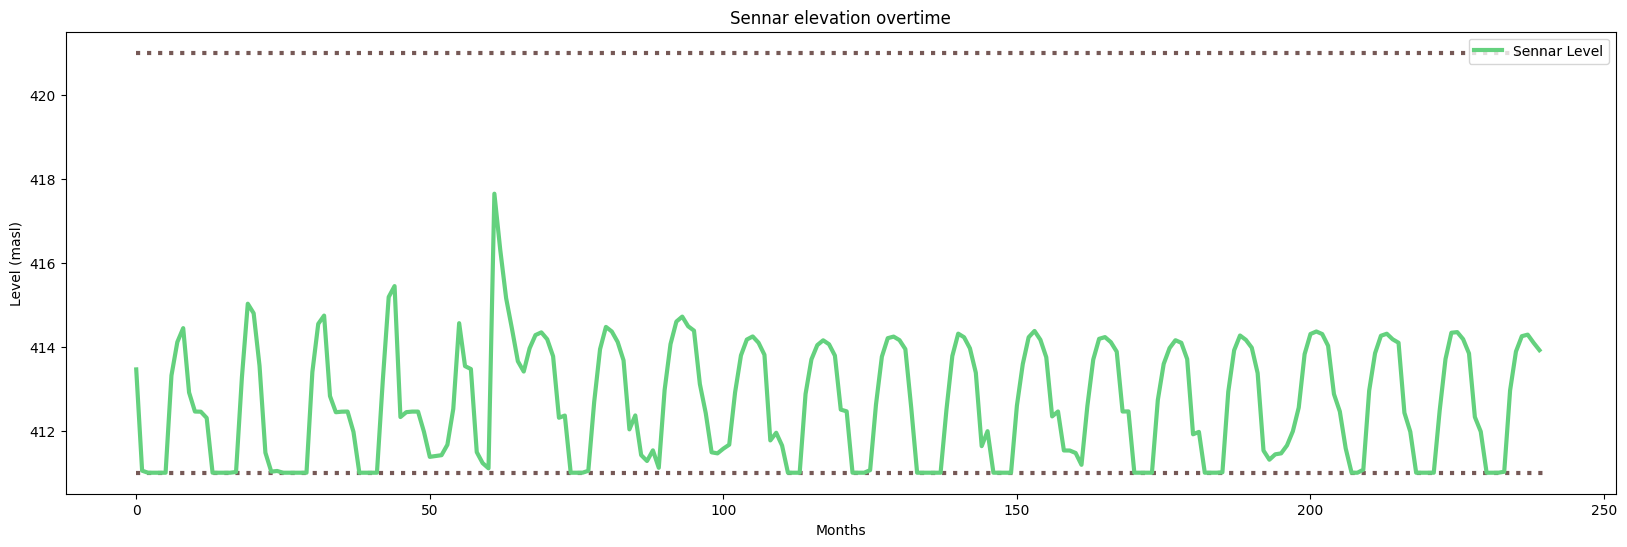

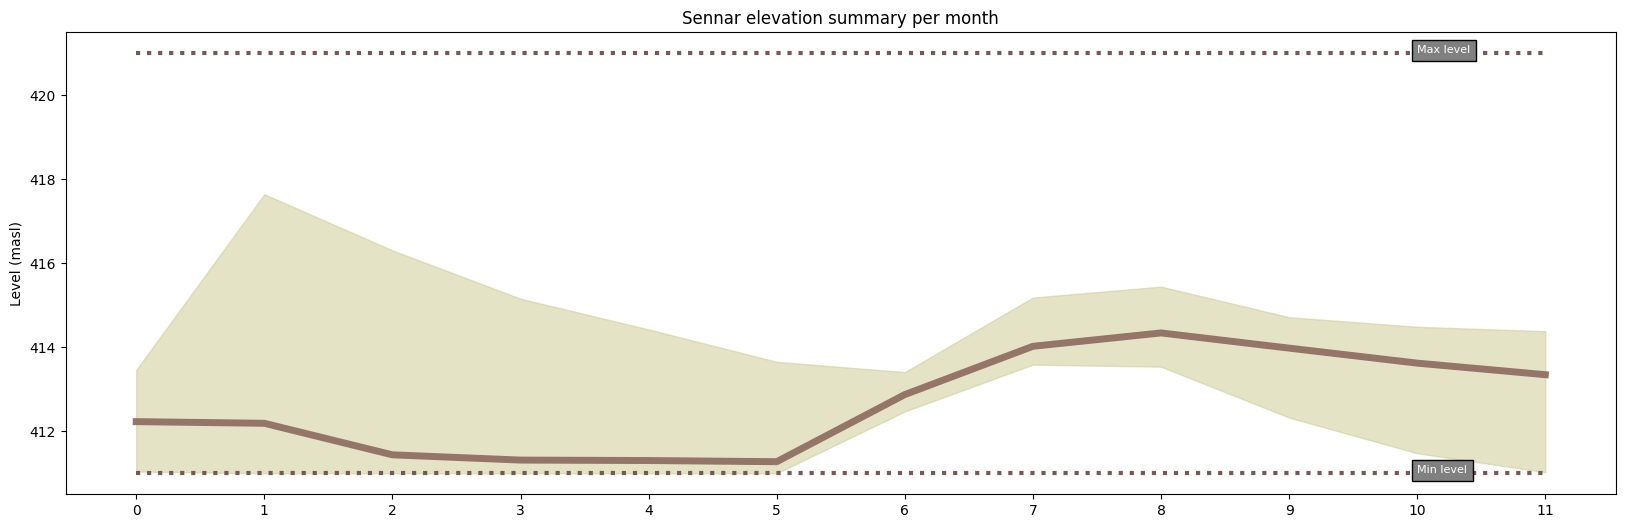

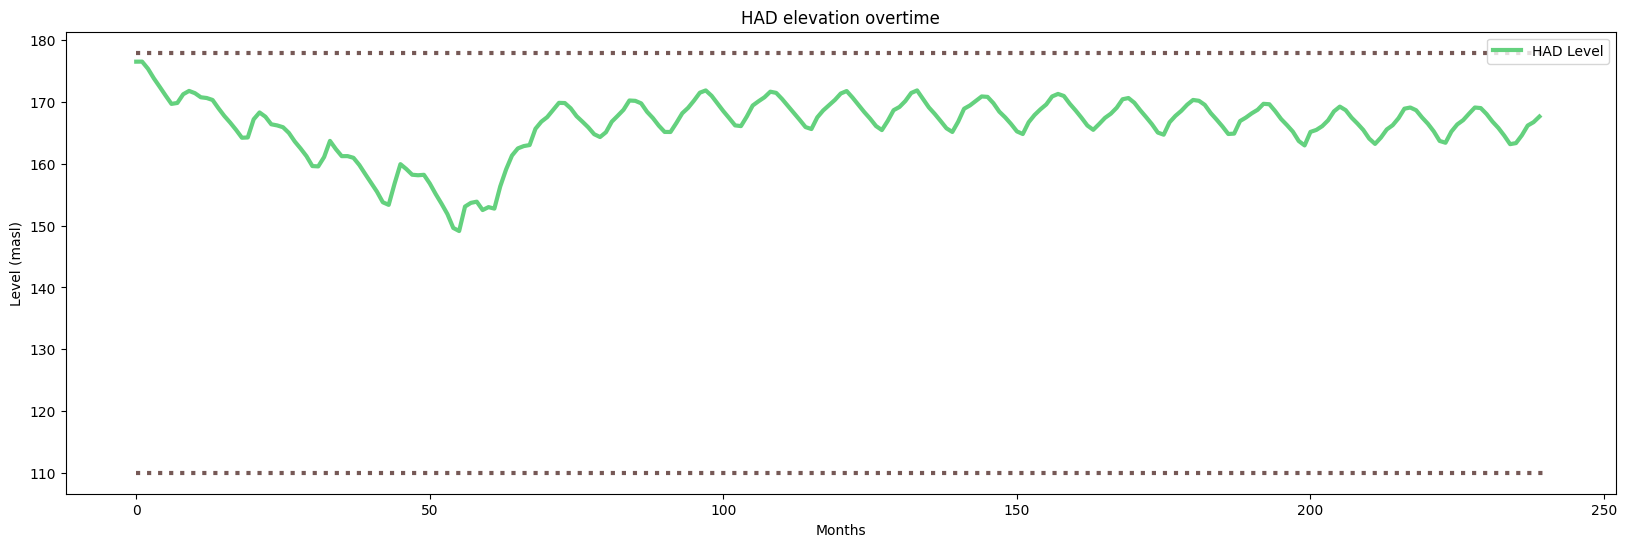

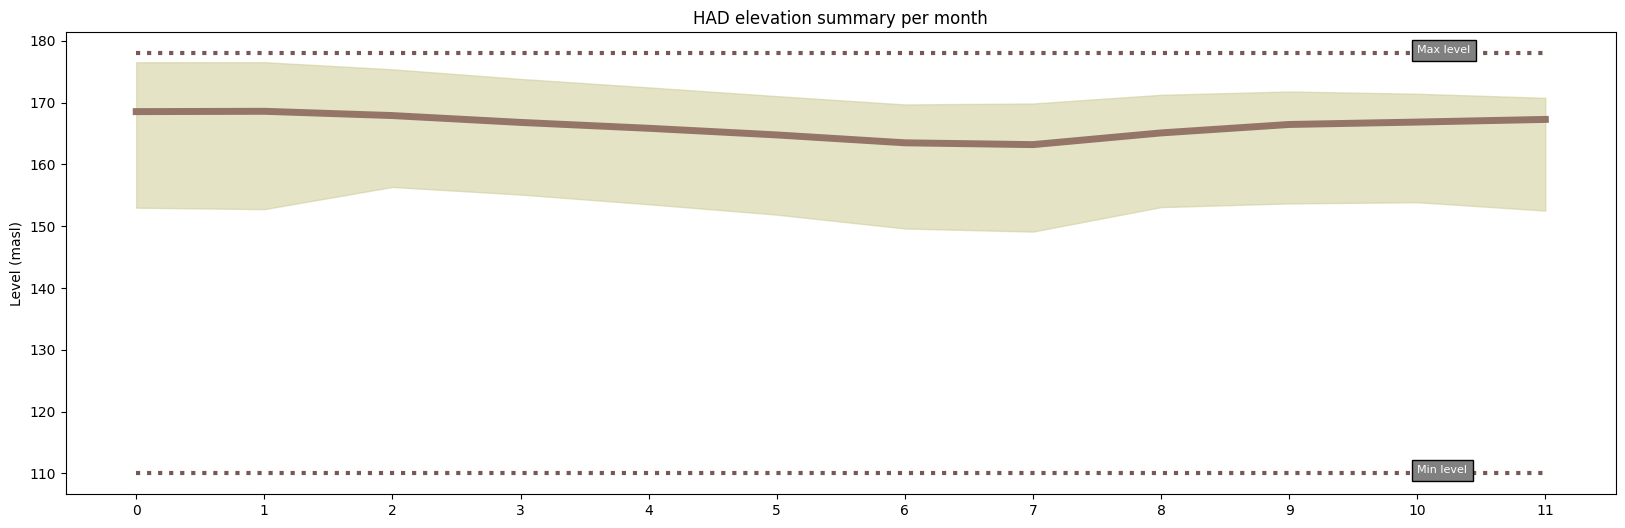

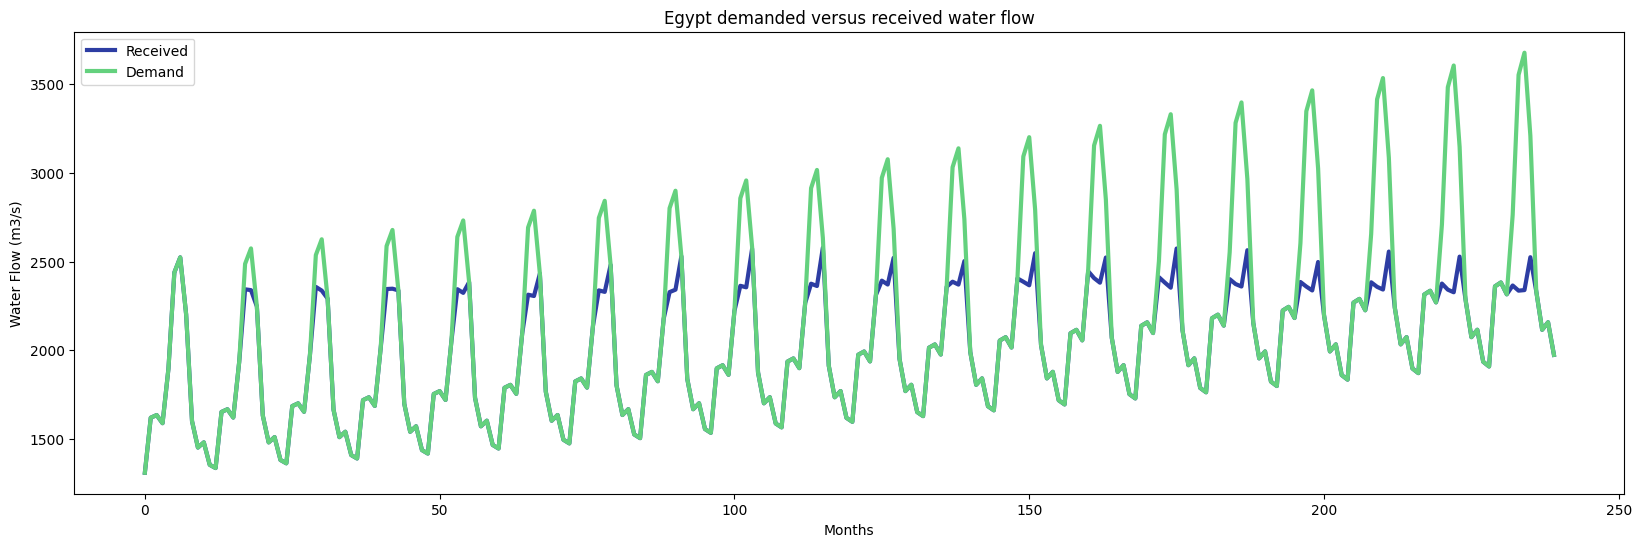

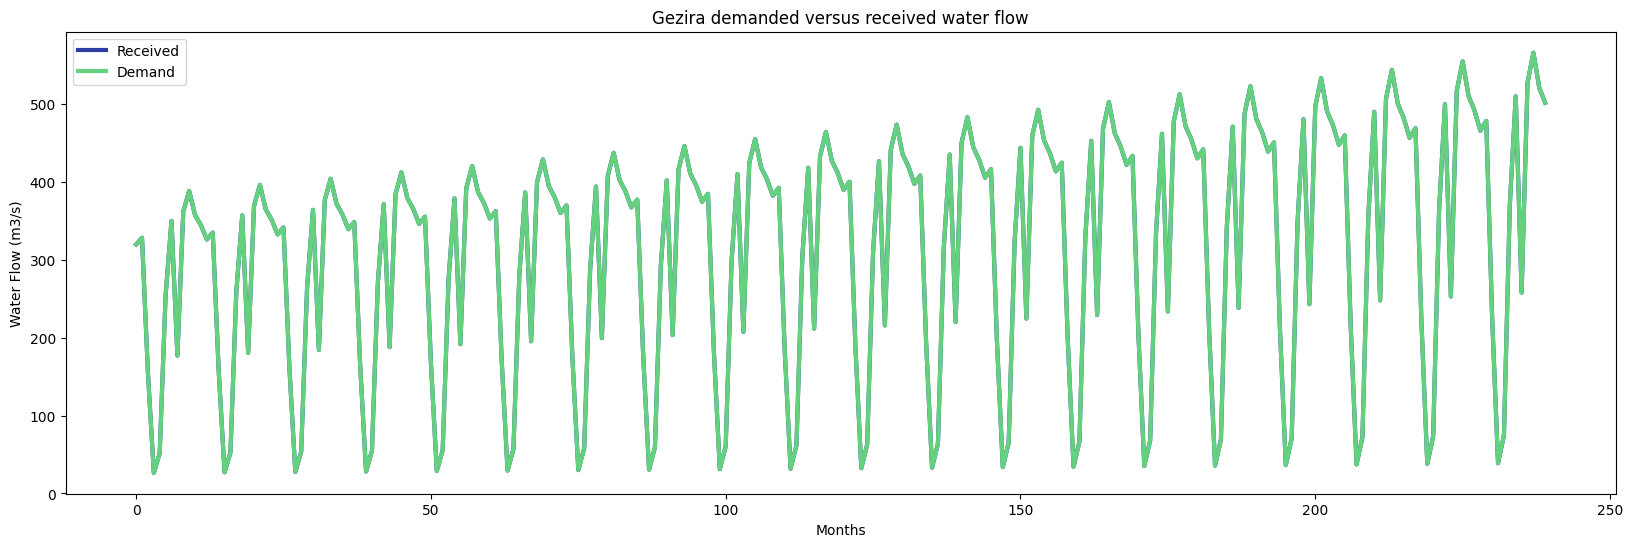

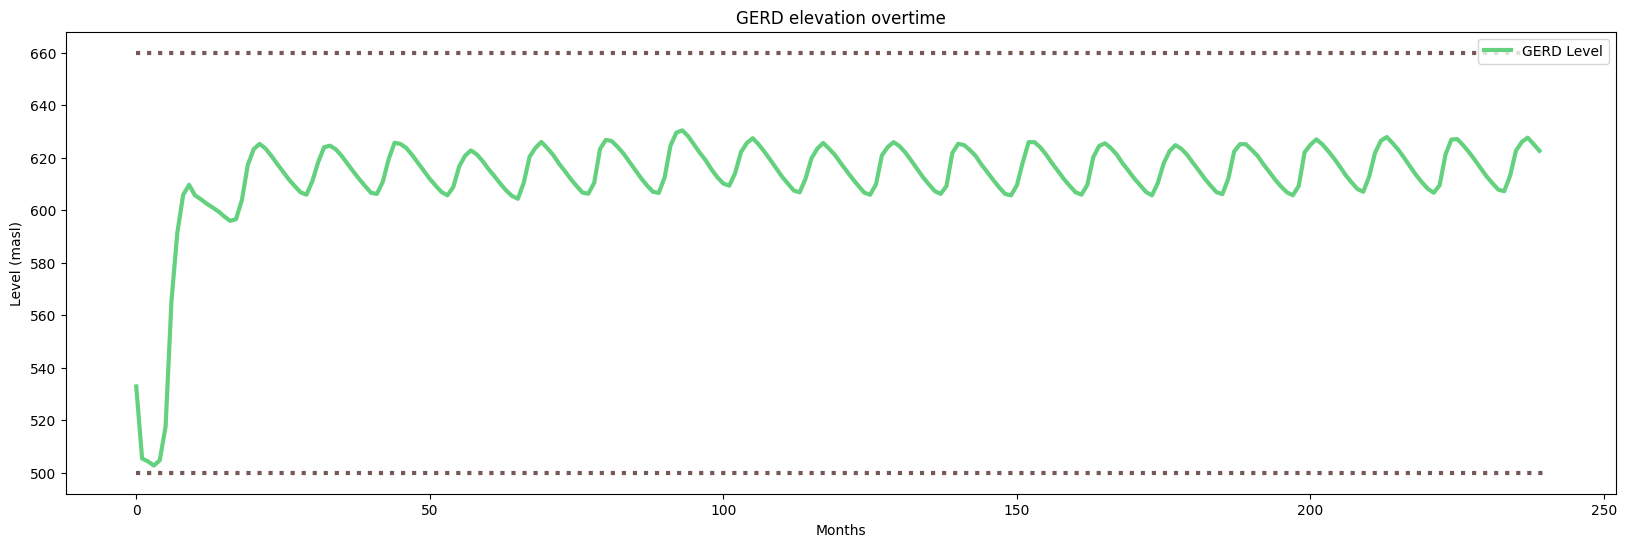

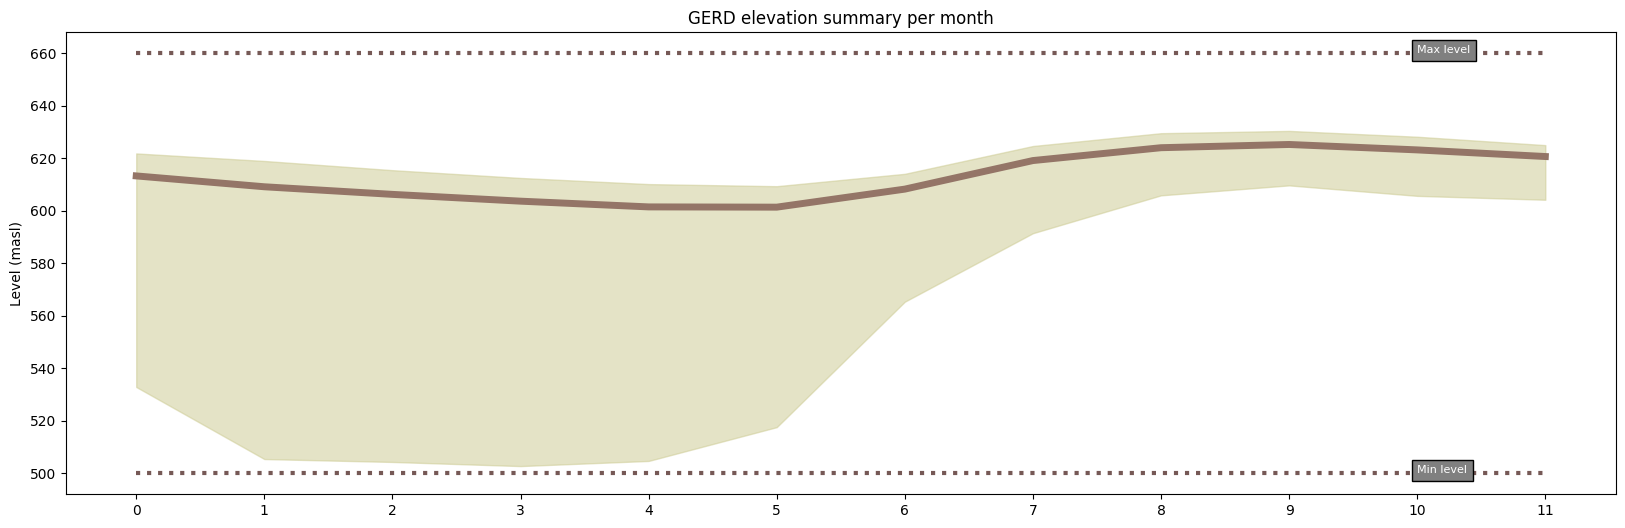

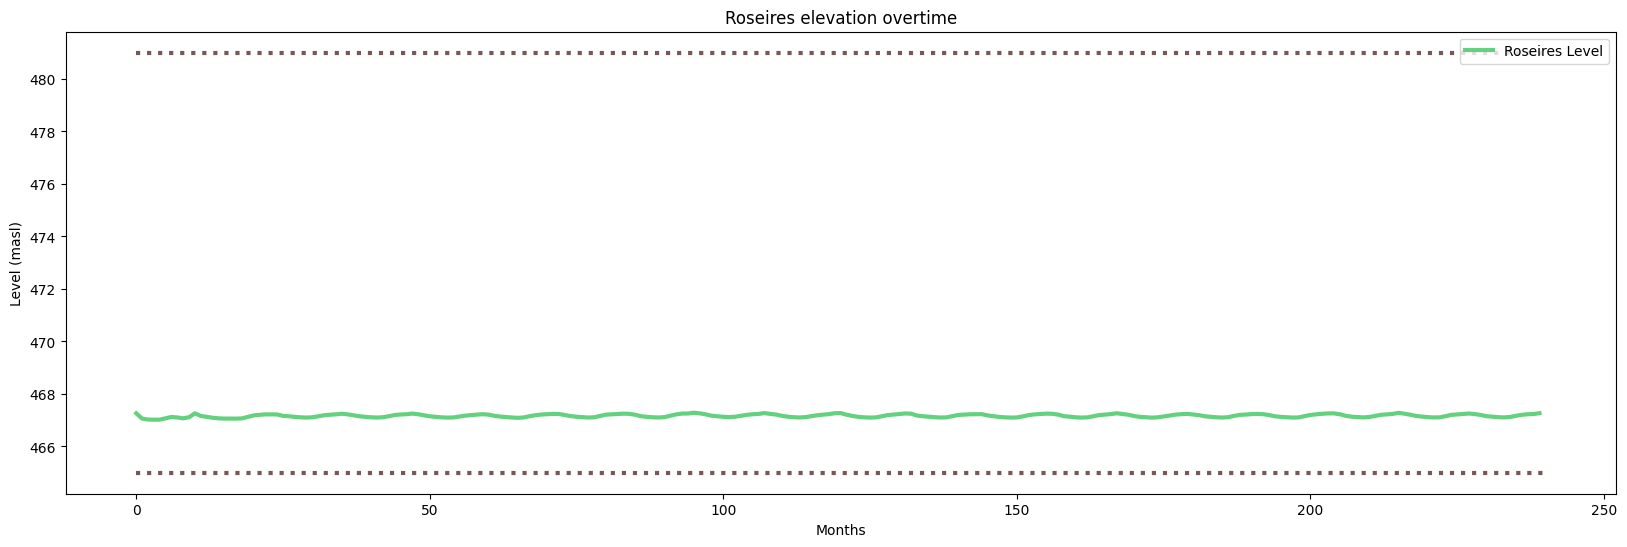

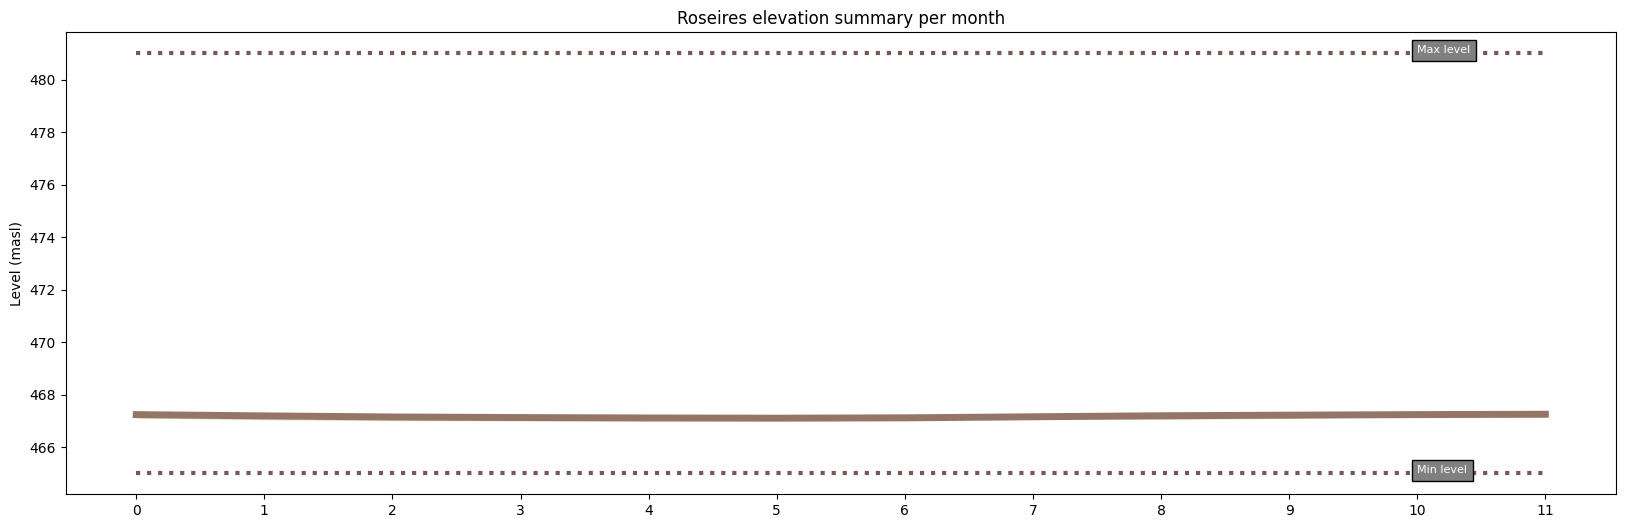

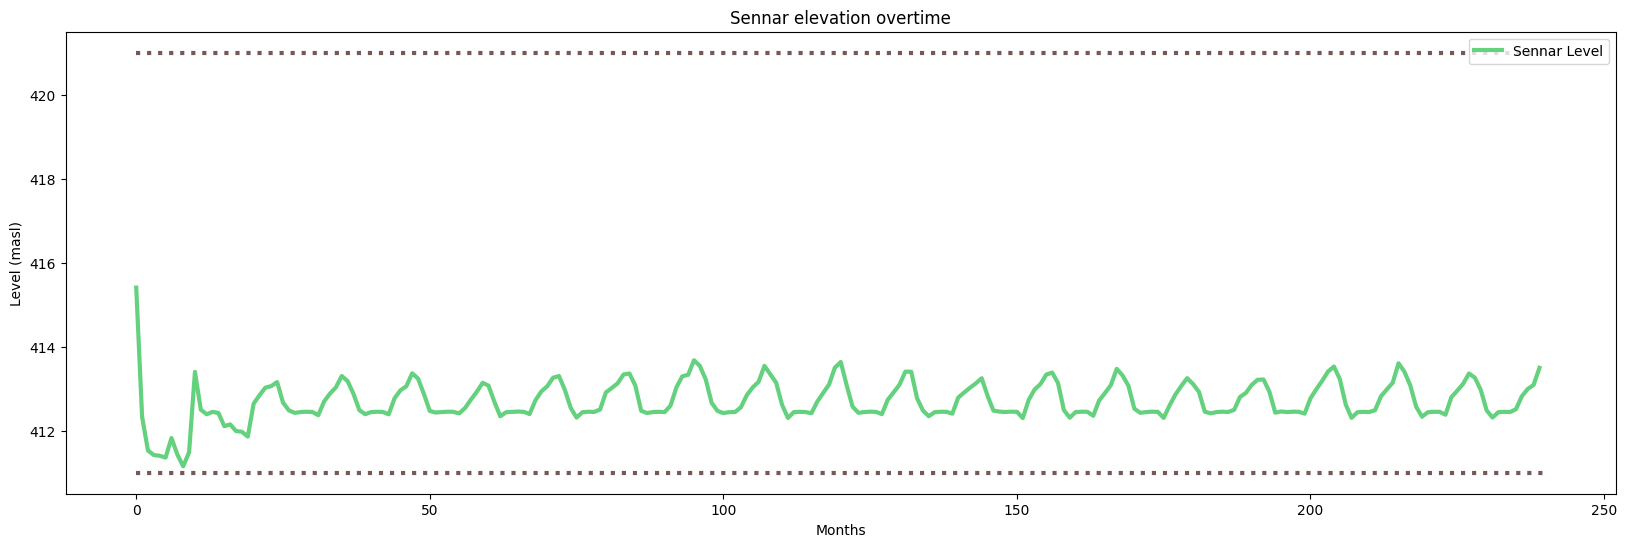

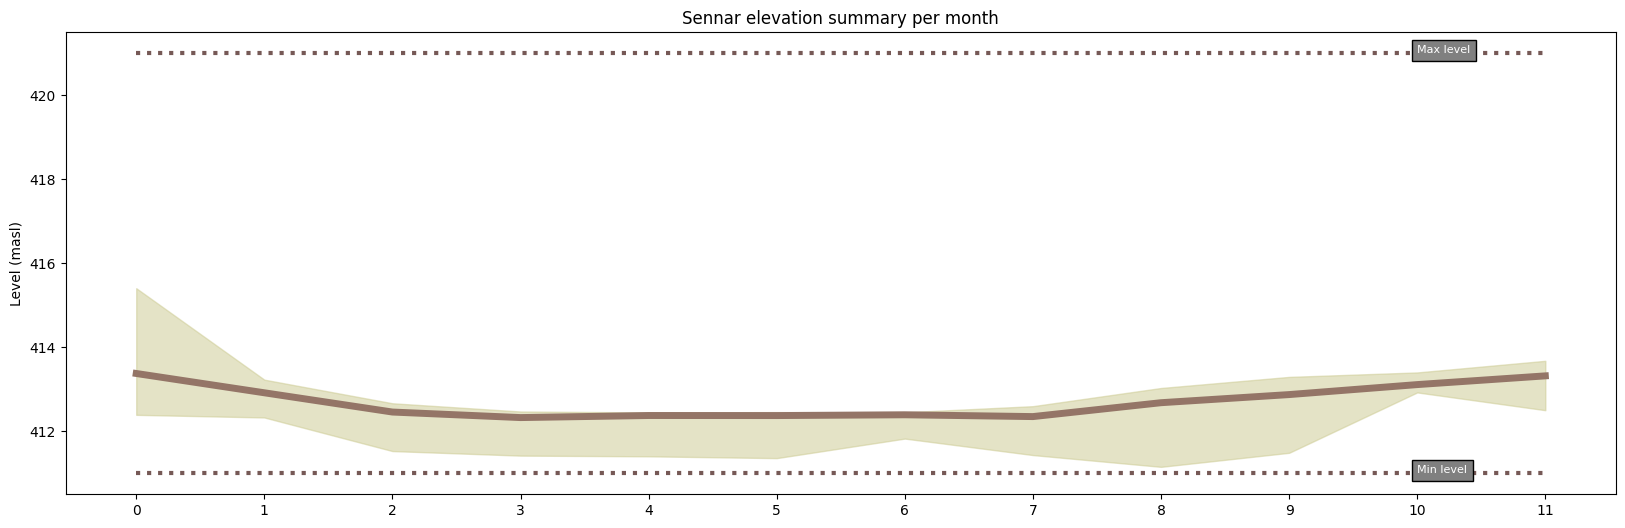

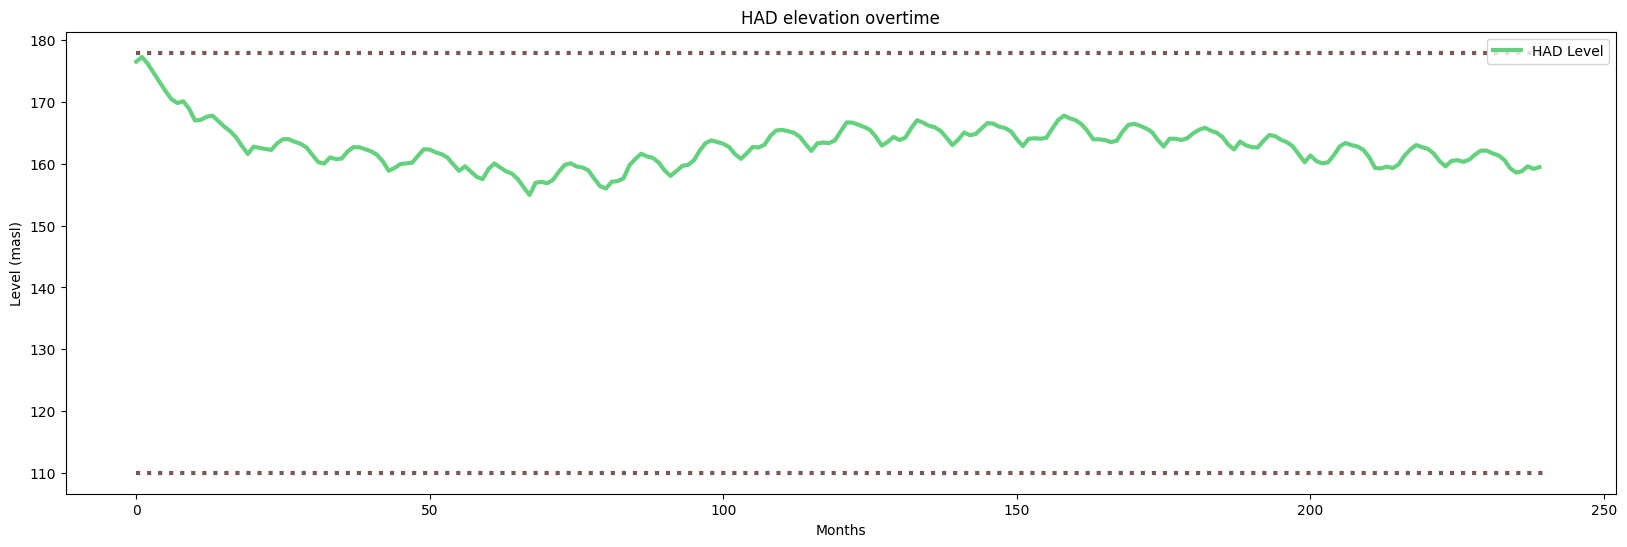

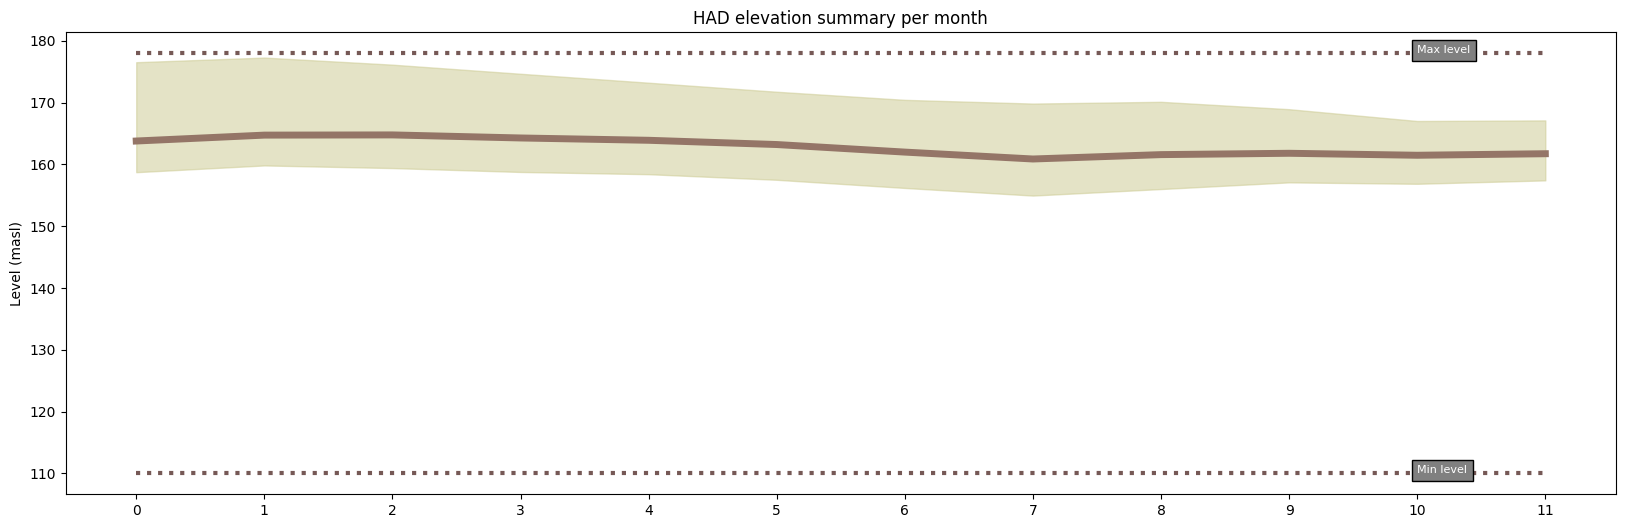

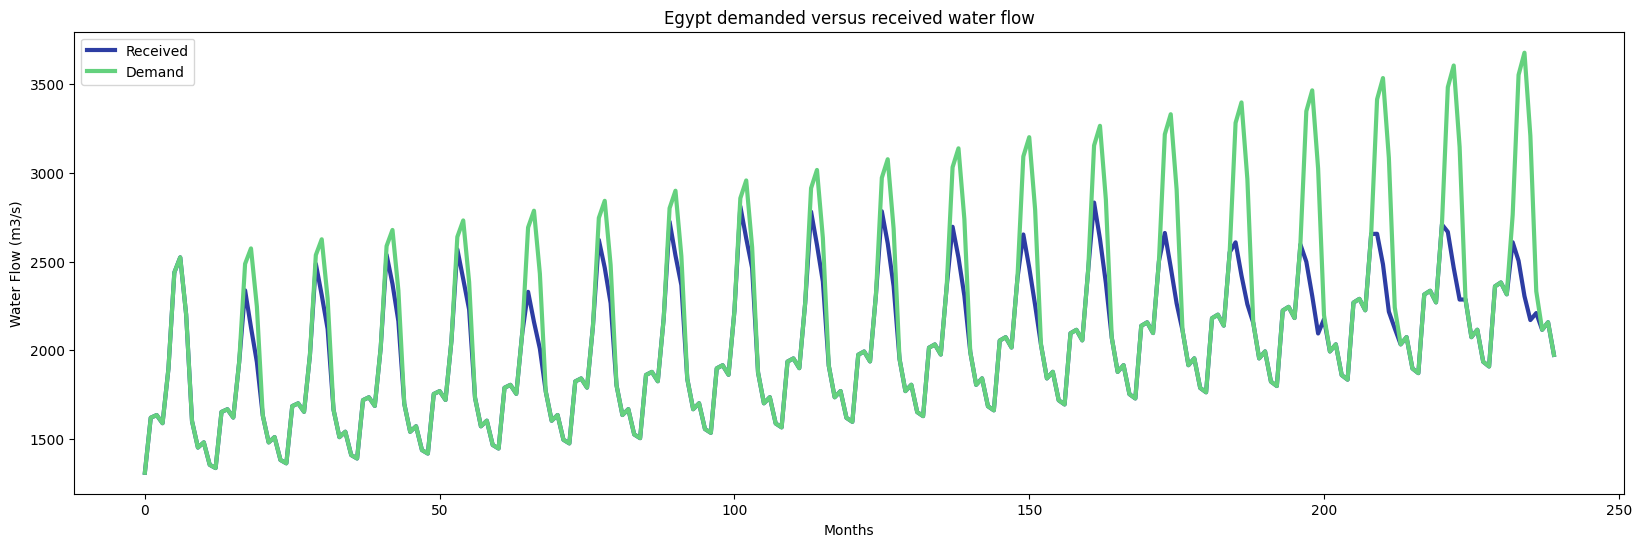

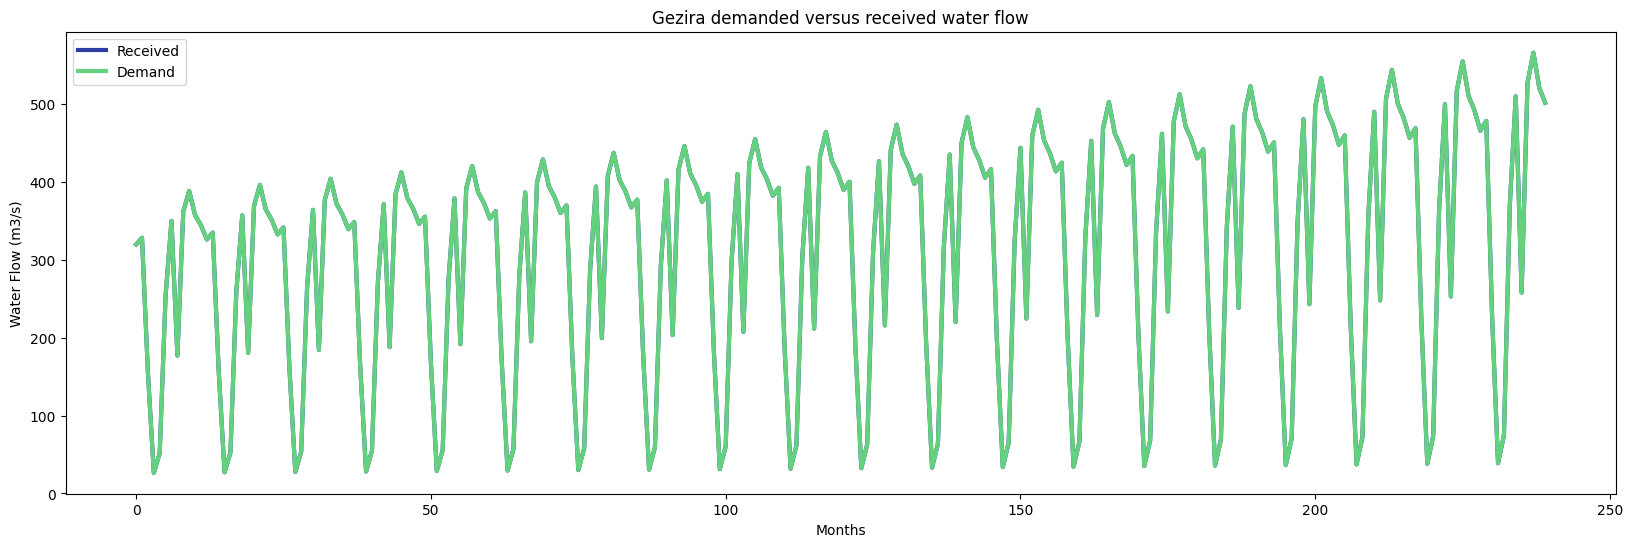

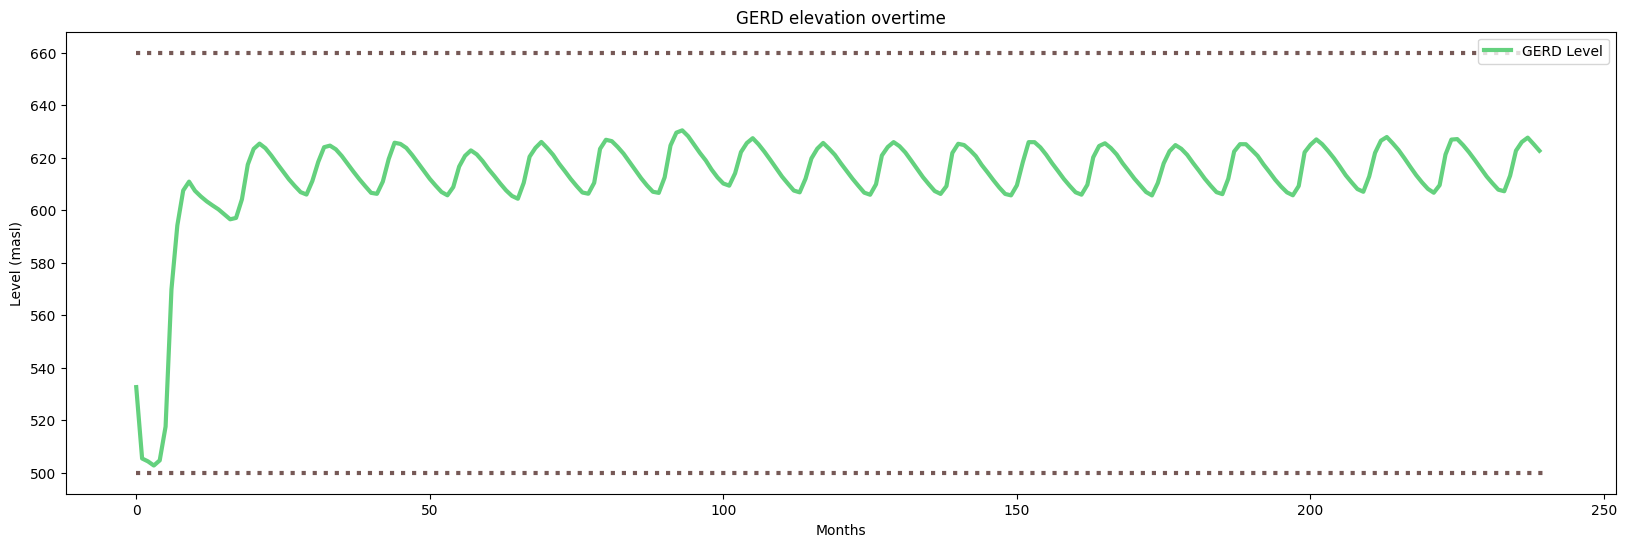

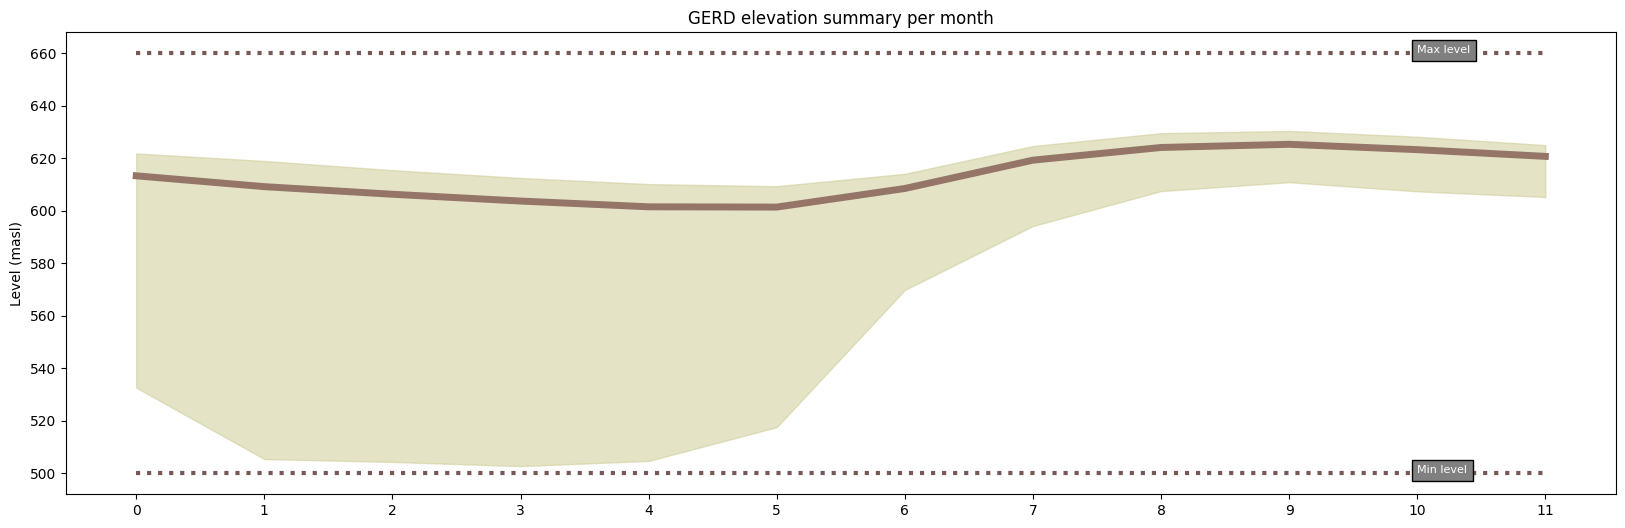

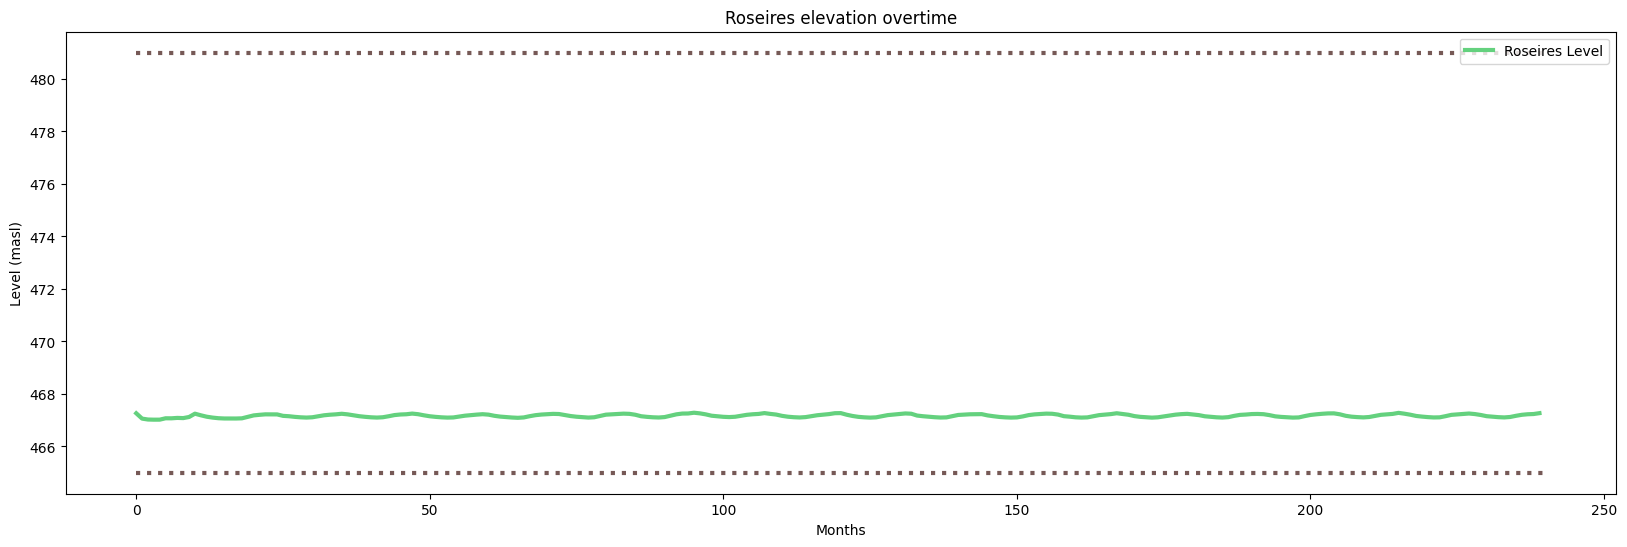

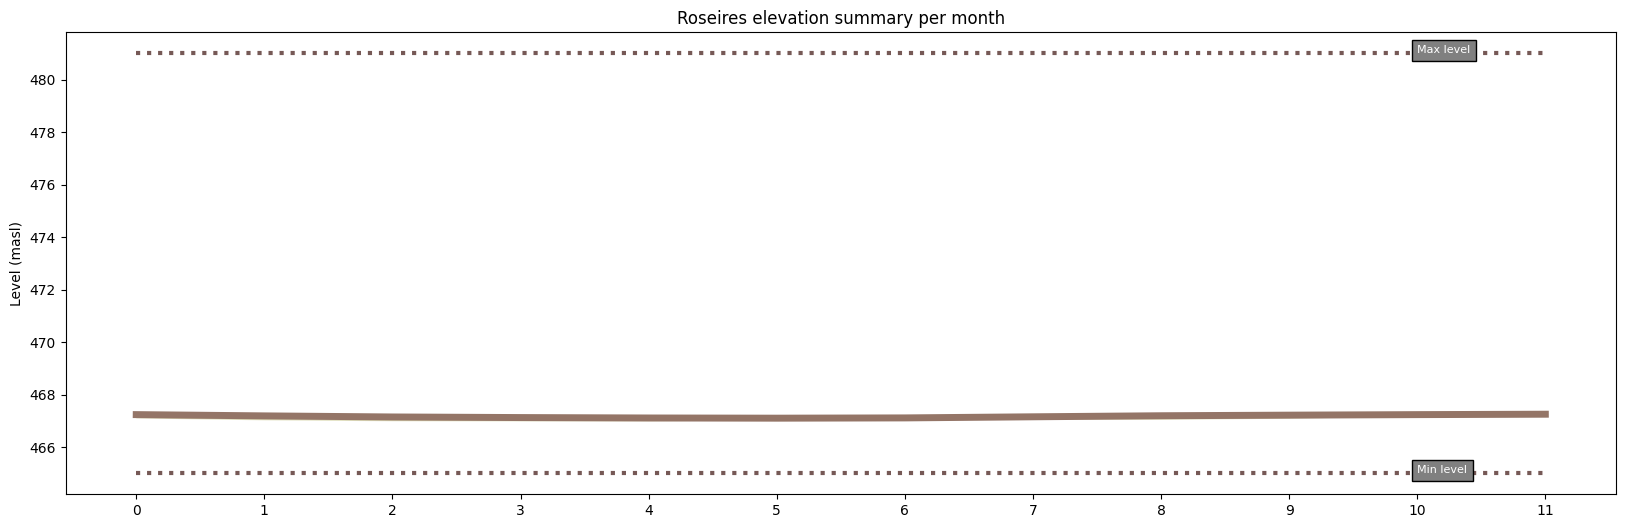

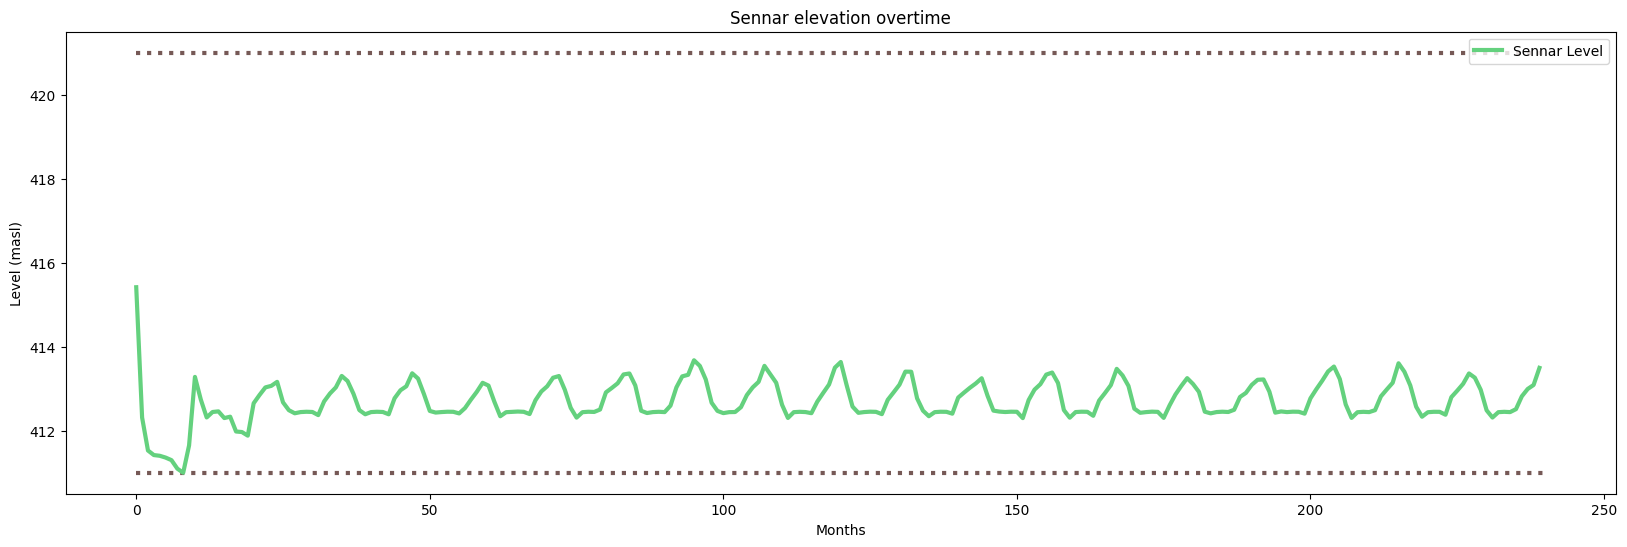

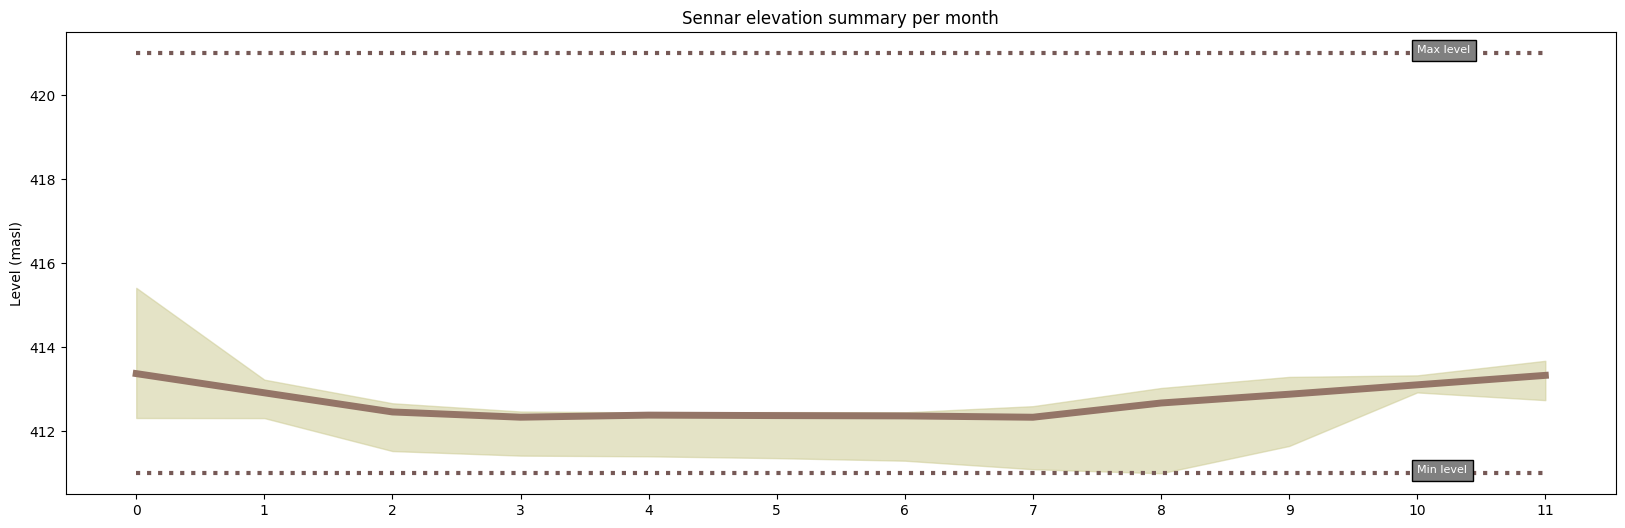

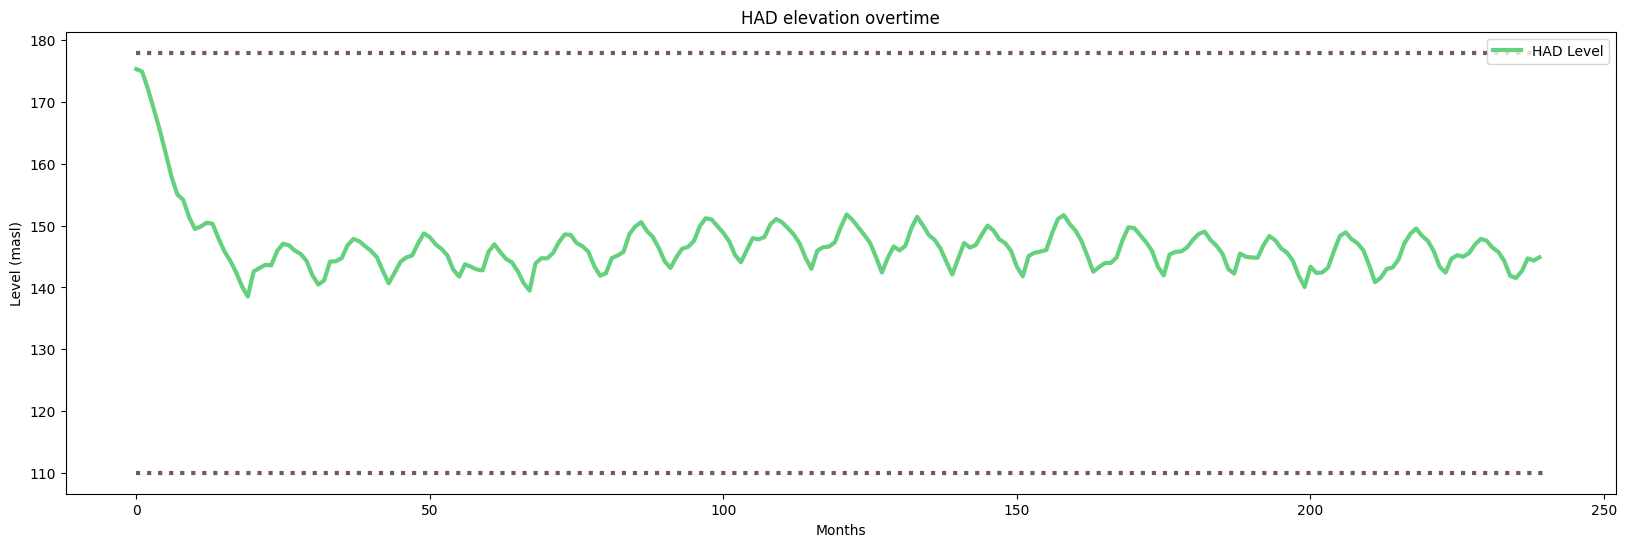

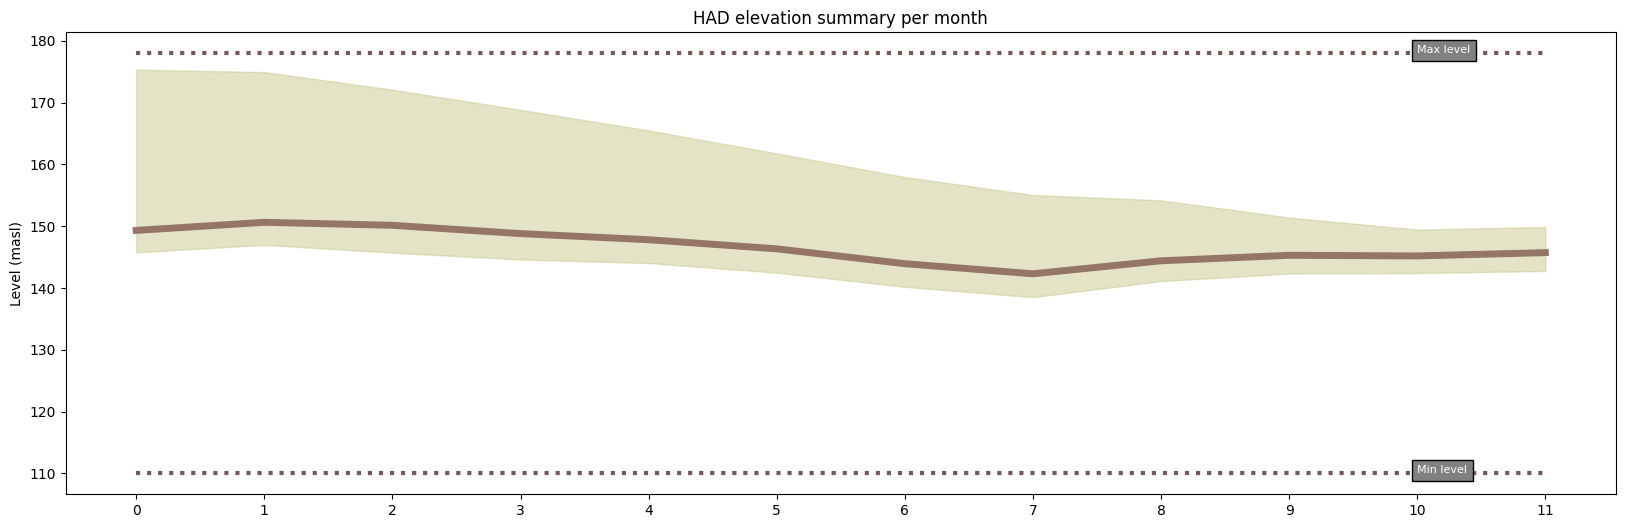

In [13]:
test_policies = [best_egypt_irr_and_HAD, best_egypt_90, best_ethiopia_hydro]
nile_model = generate_input_data(nile_model, sim_horizon=20)
model_plotter = HydroModelPlotter(nile_model)

for pol in test_policies:
    nile_model.evaluate(pol)
    model_plotter.plot_received_vs_demand_for_district("Egypt")
    model_plotter.plot_received_vs_demand_for_district("Gezira")
    
    for dam in nile_model.reservoir_names:
        model_plotter.plot_level_with_limits(dam)
        model_plotter.plot_levels_condensed(dam)
    

In [13]:
objectives

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
0,32860.160621,532.574401,0.000000,42.930183,0.0,6.200764e+07
1,34722.987677,734.532301,0.562500,42.930183,0.0,6.227318e+07
2,31422.095961,652.042734,0.562500,43.255449,0.0,5.495098e+07
3,7609.454234,62.200044,0.000000,92.657943,0.0,1.255121e+05
4,18689.382578,340.888240,0.095833,0.033902,0.0,5.302814e+07
...,...,...,...,...,...,...
117,18141.428488,307.088646,0.162500,0.000000,0.0,5.304743e+07
118,17270.116463,241.682454,0.000000,0.000000,0.0,5.268096e+07
119,19805.577704,334.260212,0.016667,0.005124,0.0,5.303458e+07
120,20382.644973,353.531612,0.000000,0.006364,0.0,5.303422e+07


In [14]:
new_order = ['egypt_irr',
 'ethiopia_hydro',
 'egypt_90',
 'egypt_low_had',
 'sudan_irr',
 'sudan_90',
 'class']

norm_df_ordered = norm_df.copy().reindex(columns=new_order)
norm_df_ordered

NameError: name 'norm_df' is not defined

In [ ]:
fig, ax = plt.subplots()
parallel_coordinates(norm_df_ordered, "class", ax=ax)

plt.show()

In [ ]:
def normalize_objectives_df(objectives_df, directions):
    
    desirability_couples = list()
    working_df = objectives_df.copy()
    for i, column in enumerate(objectives_df):
        value_range = objectives_df[column].max() - objectives_df[column].min()
        if value_range == 0:
            working_df[column] = 0
            value = objectives_df.loc[0,column]
            desirability_couples.append((value, value))
        else:
            if directions[i] == "min":
                working_df[column] = (objectives_df[column].max() - objectives_df[column]) / value_range
                desirability_couples.append((
                    objectives_df[column].max(),
                    objectives_df[column].min()
                ))
            else:
                working_df[column] = (objectives_df[column] - objectives_df[column].min()) / value_range
                desirability_couples.append((
                    objectives_df[column].min(),
                    objectives_df[column].max()
                ))
                
    return working_df, desirability_couples
    

In [ ]:
norm_df, desire_couples = normalize_objectives_df(
    objectives, ["min", "min", "min", "min", "min", "max"]
)

In [ ]:
desire_couples

In [ ]:
norm_df.describe()

In [ ]:
norm_df["class"] = 1

In [ ]:
parallel_coordinates(norm_df, "class")

In [ ]:
def parallel_plots(objectives_df):
    file_name='Best_objectives'

    names=['Egypt_irr','Egypt90_irr','Egypt_low_HAD','Sudan_irr', 'Sudan90_irr','Ethiopia_hydro']
    units=['m3','m3','none','m3','m3','MwH']

    mx=[]
    mn=[]
    for column in names:
        mx.append(str(round(objectives_df[column].max(), 1)))
        mn.append(str(round(objectives_df[column].min(), 1)))

    objectives_df=(objectives_df.max()-objectives_df)/(objectives_df.max()-objectives_df.min())
    objectives_df['Name'] = "All Solutions"
    for column in names:
        objectives_df = objectives_df.append(objectives_df.loc[objectives_df[column] == 1,:], ignore_index=True)
        objectives_df.iloc[-1,-1] = "Best " + column

    fig = plt.figure()

    ax1 = fig.add_subplot(111)

    gray='#bdbdbd'
    purple='#7a0177'
    green='#41ab5d'
    blue='#1d91c0'
    yellow='#fdaa09'
    pink='#c51b7d'

    parallel_coordinates(objectives_df,'Name', color= [gray,purple,yellow,blue], linewidth=7, alpha=.8)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=1.5, fontsize=18)
    
    i=0
    ax1.set_xticks(np.arange(3))


    ax1.set_xticklabels([mx[i]+'\n'+'\n'+names[i]+'\n'+units[i], mx[i+1]+'\n'+'\n'+names[i+1]+'\n'+units[i+1],mx[i+2]+'\n'+'\n'+names[i+2]+'\n'+units[i+2]], fontsize=18)
    ax2 = ax1.twiny()
    ax2.set_xticks(np.arange(3))
    ax2.set_xticklabels([mn[i], mn[i+1],mn[i+2]], fontsize=18)
    ax1.get_yaxis().set_visible([])
    plt.text(1.02, 0.5, 'Direction of Preference $\\rightarrow$', {'color': '#636363', 'fontsize': 20},
             horizontalalignment='left',
             verticalalignment='center',
             rotation=90,
             clip_on=False,
             transform=plt.gca().transAxes)

    fig.set_size_inches(17.5, 9)